# 1.

**Importing Necessary Packages**

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 2.Reading the dataframe

In [2]:
df=pd.read_csv('C:\\Users\\VGopalak\\Downloads\\insurance (2).csv')

# 3. EDA 

**Checking first 5 rows**

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.a

# Shape of the data

In [4]:
df.shape

(1338, 7)

**We have 7 columns and 1338 rows**

# 3.b

# Checking Datatypes

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**We have three datatypes(int,float,object).Columns "Sex","smoker","region" has characters since it is shown as object.**

# 3.c

# Missing Value Check

In [6]:
def missing_check(df):
    Total=df.isnull().sum().sort_values(ascending=False)
    Percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percentage'])
    return missing_data

In [7]:
missing_check(df)

,Total,Percentage
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


**There is no missing value in the dataset**

# 3.d

# 5 Point Summary

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**1.Age,Bmi,Children column has similar mean and median. So there is not skewness for these columns.**

**2.Age has minimum value as 18. Hence this data only has information about adults.**

**3.75% of people have 2 or less children**

**4.Charges mean is higher than median so there might be right skewness.**

**5.Box plots are shown in below notebook in outlier analysis. We can get clear picture on box plot**

# 3.e

# Distribution of numerical columns

# Distribution of BMI column

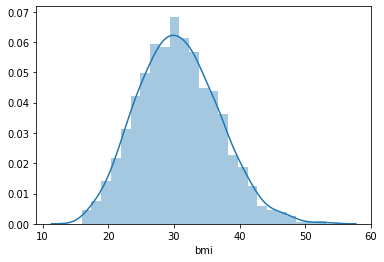

In [9]:
sns.distplot(df['bmi'])

**BMI values are normally distributed**

# Distribution of Age  column

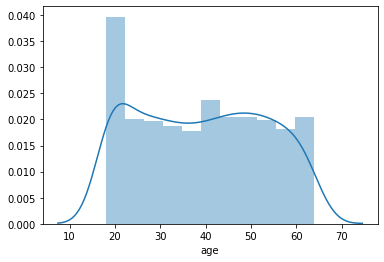

In [10]:
sns.distplot(df['age'])

**There is normality maintained in age column. Center area is little wider.**

# Distribution of Charges column 

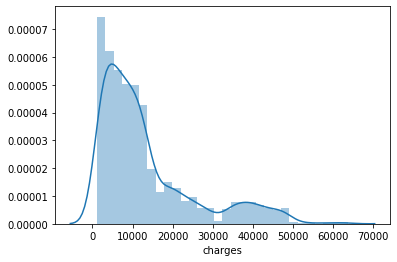

In [11]:
sns.distplot(df['charges'])

**Charges column are right skewed.Many extreme values towards right.**

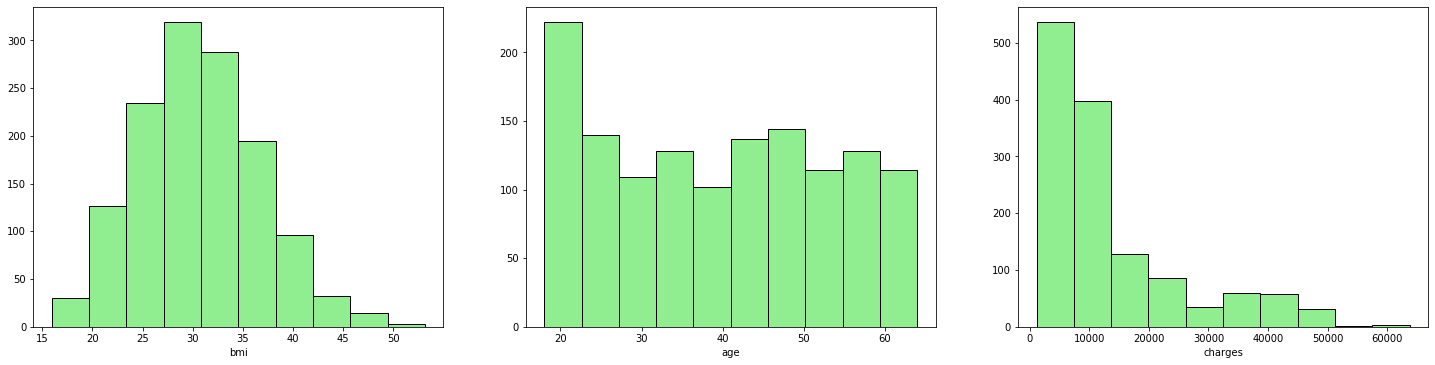

In [95]:
#We can also use histogram to see the distribution

plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.hist(df['bmi'],color='lightgreen',edgecolor='black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df['age'],color='lightgreen',edgecolor='black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df['charges'],color='lightgreen',edgecolor='black')
plt.xlabel('charges')

plt.show()

**BMI:Most of people has bmi around 25 to 35. Very less people has very large bmi.**

**AGE:People who has age 20 is more compared to others.**

**CHARGES:Charges are around 10,000 . Large amount of medical charges are not billed much by health insurance.**

# 3.f

# Measure of Skewness

**BMI**

In [135]:
a=df['bmi'].skew()
print('Skewness of BMI is:',a)

Skewness of BMI is: 0.2840471105987448


**Age**

In [136]:
b=df['age'].skew()
print('Skewness of AGE is:',b)

Skewness of AGE is: 0.05567251565299186


**Charges**

In [137]:
c=df['charges'].skew()
print('Skewness of Charges is:',c)

Skewness of Charges is: 1.5158796580240388


**Making these skewness into Dataframe**

In [99]:
skew=pd.DataFrame({'Skewness': [df['bmi'].skew(),df['age'].skew(),df['charges'].skew()]},
                 index=['bmi','age','charges'])
skew

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


**We can see charges have more skewness.**

# 3.g

# Checking Outliers

**BMI**

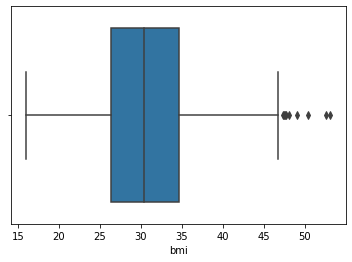

In [15]:
sns.boxplot(x=df['bmi'])

**There few outliers in BMI column**

In [108]:
#checking count of outliers.
q25,q75=np.percentile(df['bmi'],25),np.percentile(df['bmi'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['bmi'] if i < lower or i > upper]
print('Total Number of outliers in BMI: ',len(Outliers))

Total Number of outliers in BMI:  9


**Age**

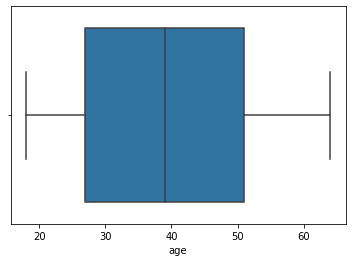

In [16]:
sns.boxplot(x=df['age'])

In [109]:
#checking count of outliers.
q25,q75=np.percentile(df['age'],25),np.percentile(df['age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['age'] if i < lower or i > upper]
print('Total Number of outliers in AGE: ',len(Outliers))

Total Number of outliers in AGE:  0


**There is no ouliers in age column**

**Charges**

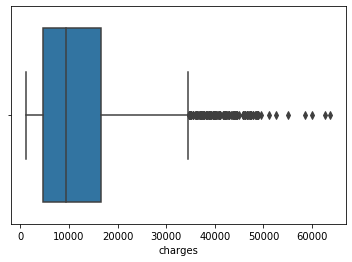

In [17]:
sns.boxplot(x=df['charges'])

**There are large number of ouliers in charges column**

In [110]:
#checking count of outliers.
q25,q75=np.percentile(df['charges'],25),np.percentile(df['charges'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['charges'] if i < lower or i > upper]
print('Total Number of outliers in charges: ',len(Outliers))

Total Number of outliers in charges:  139


# 3.h

# Distribution of categorical columns.

**Sex**

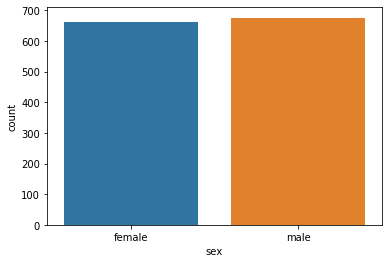

In [19]:
sns.countplot(x='sex',data=df)

**Both Female and Male has equal counts**

**Bi variate:Sex vs charges**

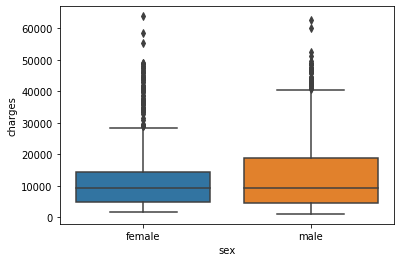

In [111]:
sns.boxplot(x='sex',y='charges',data=df)

**When compared with charges. Male has paid higher charges. Anyhow there are extreme values in both gender.**

**Children**

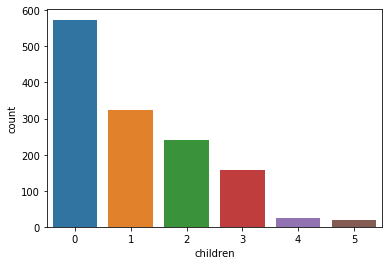

In [20]:
sns.countplot(x='children',data=df)

**Most of the peoples doen't have children.**

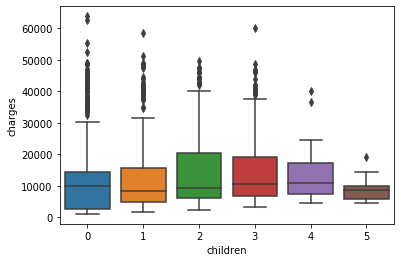

In [112]:
sns.boxplot(x='children', y='charges', data= df)

**When there is no children many has paid higher charges while least paid by people with 5 childrens.**

**Smoker**

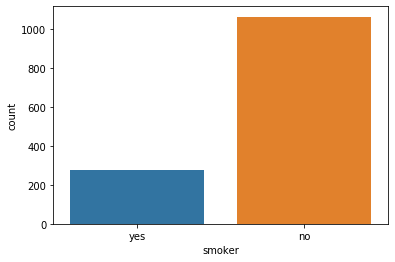

In [21]:
sns.countplot(x='smoker',data=df)

**Most of People are non-smokers**

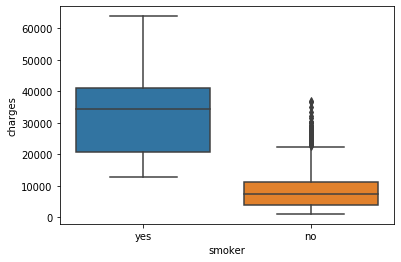

In [113]:
sns.boxplot(x='smoker', y='charges', data= df)

**Smokers has high medical charges compared to non-smokers.Few of the non-smokers also paid extreme charges**

**Region**

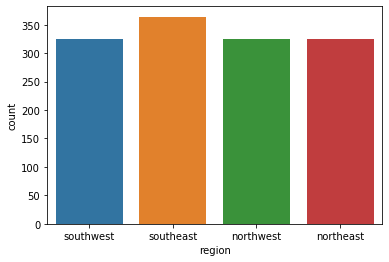

In [22]:
sns.countplot(x='region',data=df)

**More or less equal count in all regions. Southeast has little more count compared to others.**

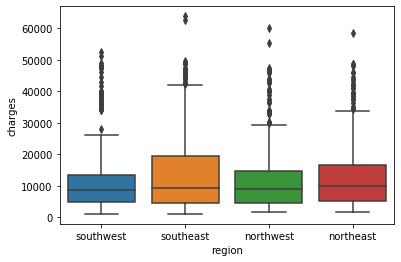

In [114]:
sns.boxplot(x='region', y='charges', data= df)

**Each location pay some extreme charges. Southeast pay more compared to others.**

# 3.i

# Pairplots

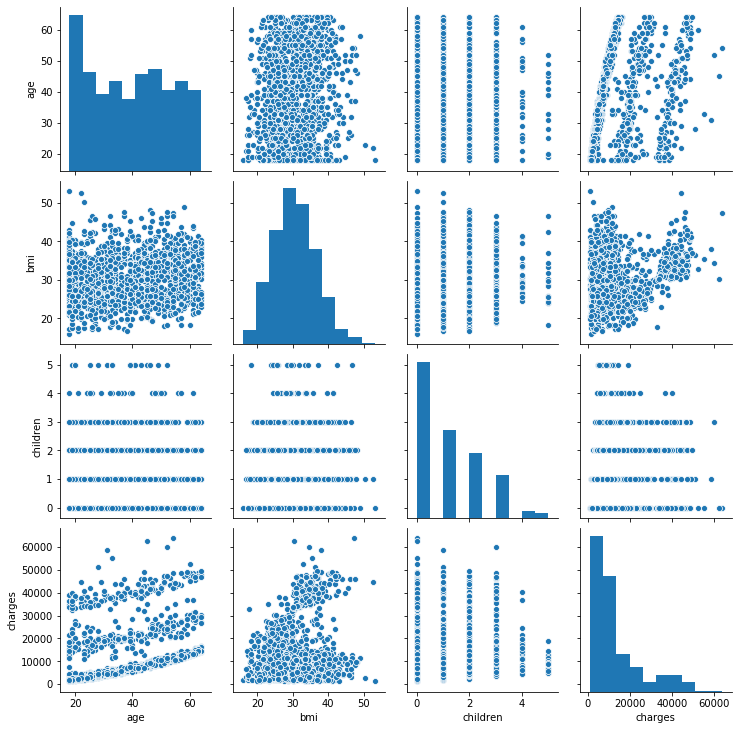

In [123]:
sns.pairplot(df)
plt.show()

**We can see pairplots ignoring character variables. We can encode characters then we can check the pairplot**

In [118]:
df1=df.copy()

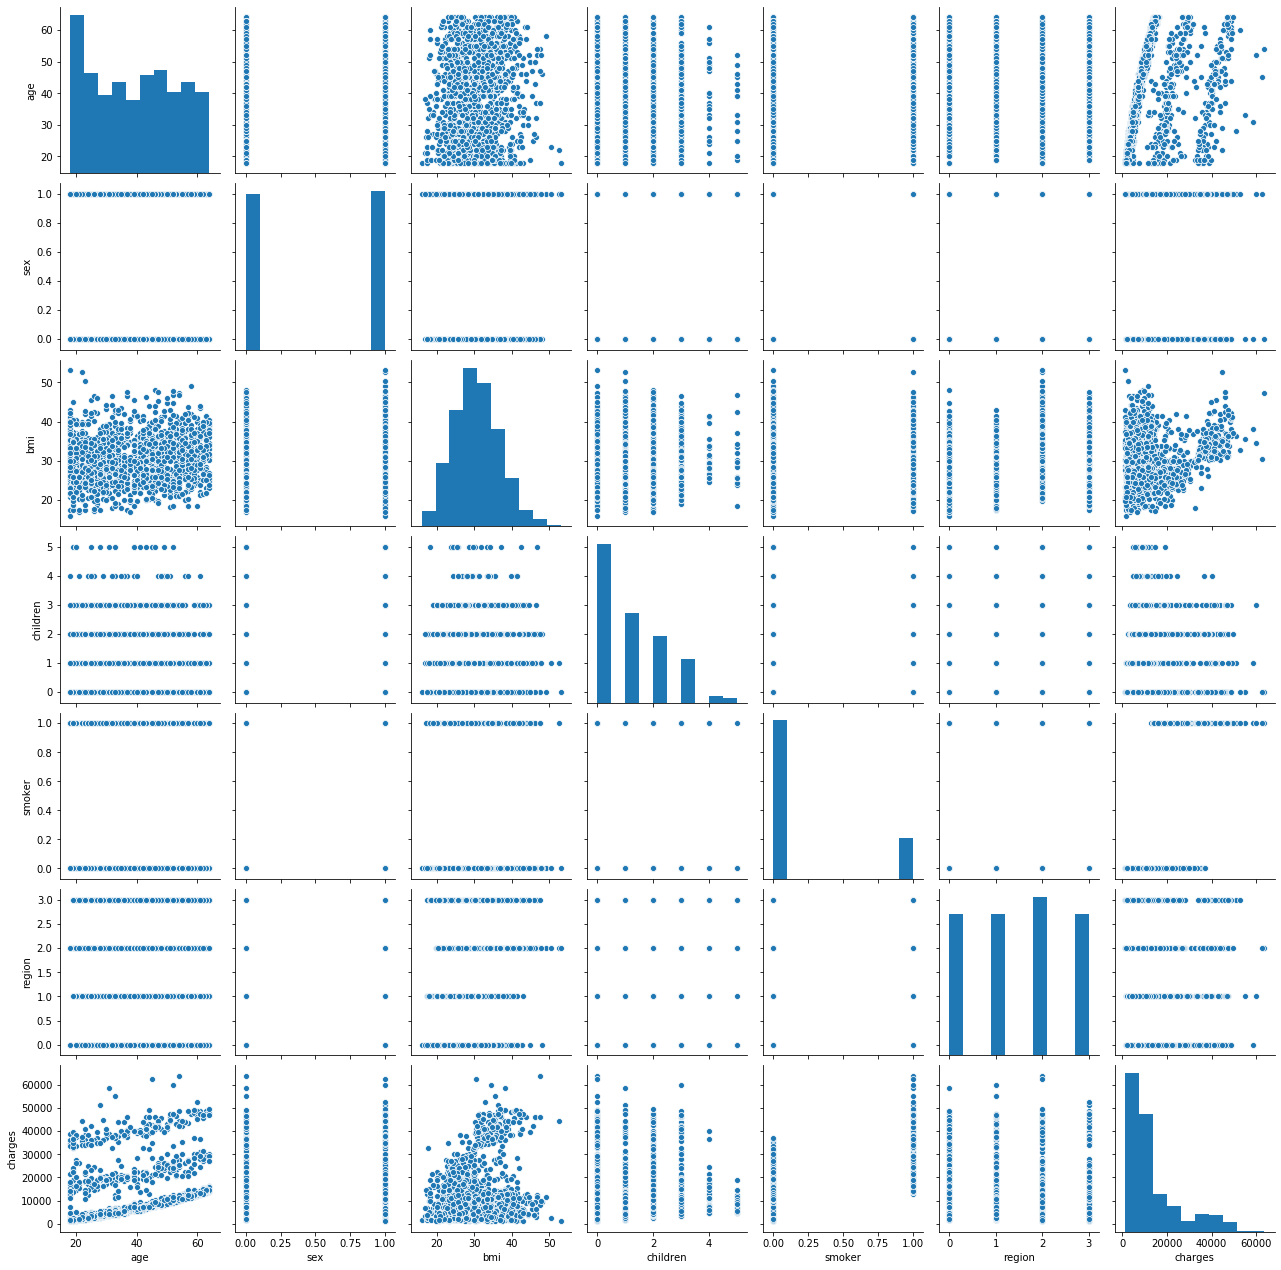

In [122]:
df1.loc[:,['sex','smoker','region']]=df1.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df1)

**There is some relationship between age and charges column.**

**Some Extreme bmi has less charges and higher charges as well. BMI and Age shows no proper relation**

**Smoker has more charges compared to non-smokers**

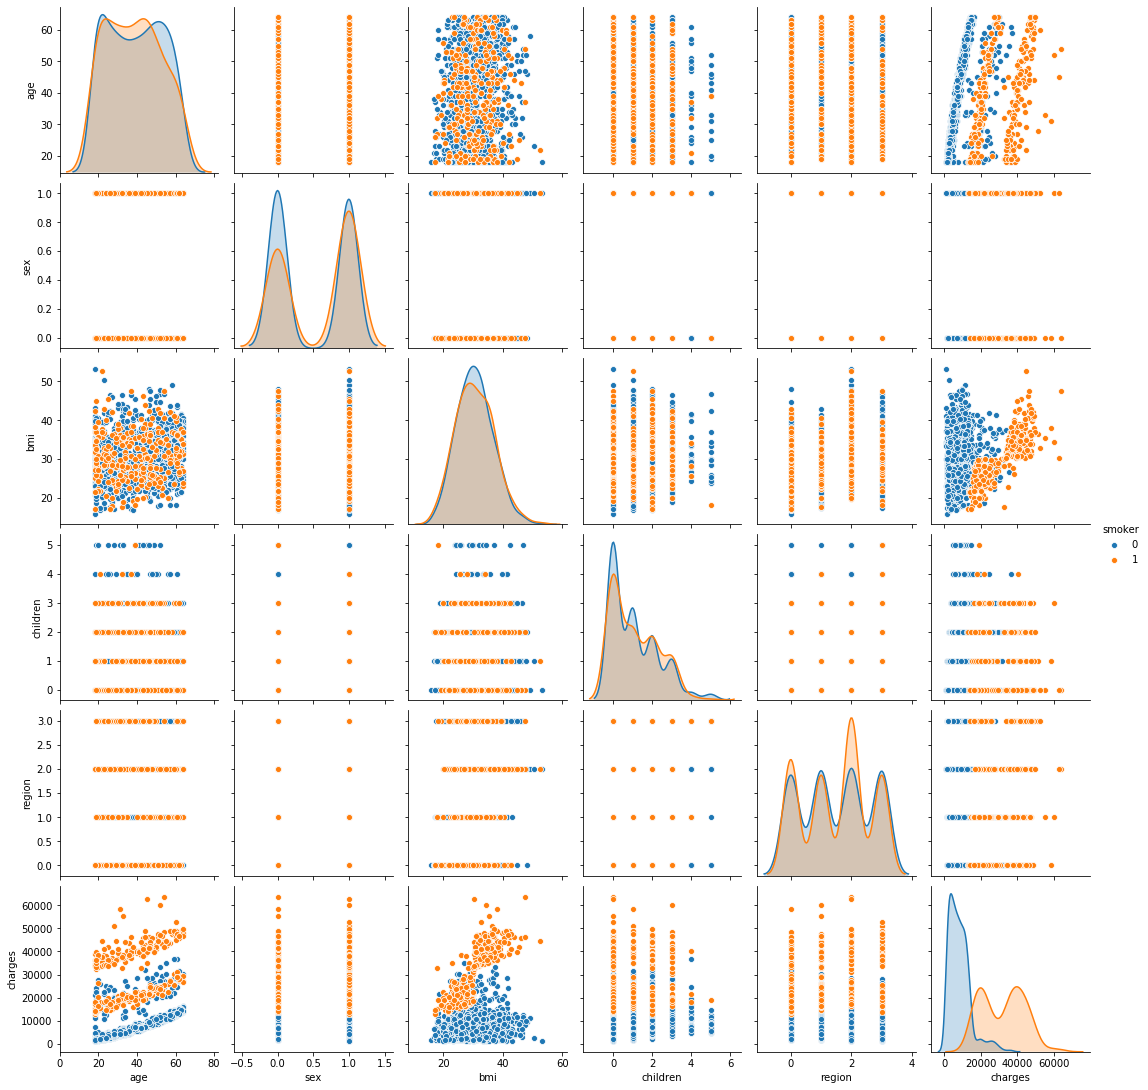

In [124]:
sns.pairplot(df1,hue='smoker')

**Charges are more for people who are somkers**


**Smokers are present in all ages**

# Statistical Tests

# 4.a

# Do charges of people who smoke differ significantly from the people who don't?

**H0:Charges of smoker and non-smoker are same**

**H1:Charges of smoker and non-smoker are not same**

**T-test**

**We have two samples of Smokers charges and Non-Smokers charges.**


**Here we will be using two-sample unpaired t-test**

In [126]:
from scipy.stats import  ttest_ind
import scipy.stats as stats 
import numpy as np

In [127]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

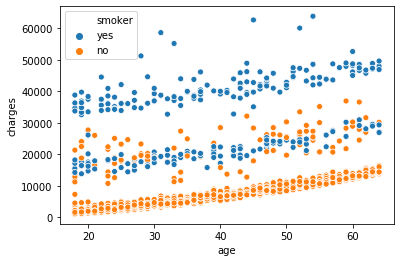

In [128]:
sns.scatterplot(df['age'],df['charges'],hue=df['smoker'])

**We can clearly see that charges are vary between smoker and non-smoker. Smokers are charged more compared to non-smoker. Anyhow we will statistically prove that to make conclusion.**

In [129]:
x = np.array(df[df.smoker == 'yes'].charges) 
y = np.array(df[df.smoker == 'no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0) 
print('P_Value:', p_value)

P_Value: 8.271435842177219e-283


In [130]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Charges of smoker and non-smoker are not same')
else:
    print('Fail to Reject Null Hypothesis.Charges of smoker and non-smoker are  same')

Rejecting Null Hypothesis.Charges of smoker and non-smoker are not same


# 4.b

# Does bmi of males differ significantly from that of females?

**H0:Bmi of Male and Female are same i.e Gender does not have effect on bmi**

**H1:Bmi of Male and Female are not same i.e Gender have effect on bmi**

**T-test**

**We have two samples of Male Bmi and Female BMI.**

**Here we will be using two-sample unpaired t-test**

In [131]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

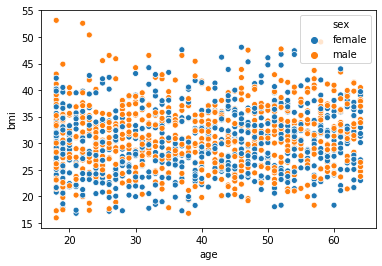

In [132]:
sns.scatterplot(df['age'],df['bmi'],hue=df['sex'])

**Gender is equally distributed for bmi. Through visualization we can say gender does not have any effect on bmi. We can check statistical test to make conclusion.**

In [133]:
bmi_male=np.array(df[df.sex == 'male'].bmi)
bmi_female=np.array(df[df.sex == 'female'].bmi)
t, p_value  = stats.ttest_ind(bmi_male,bmi_female, axis = 0) 
print('P_Value:', p_value)

P_Value: 0.08997637178984932


In [134]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Gender has effect on bmi')
else:
    print('Fail to Reject Null Hypothesis.Gender does not have any effect on bmi')

Fail to Reject Null Hypothesis.Gender does not have any effect on bmi


# 4.c

# Is the proportion of smokers significantly different in different genders? 

**H0:Gender does not have effect on smokers**

**H1: Gender has efect on smokers**

**We are using chi-square test to compare two categorical data**

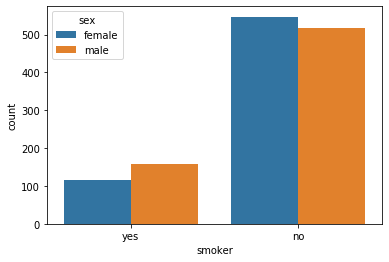

In [61]:
sns.countplot(df['smoker'],hue=df['sex'])

**Visulally we can say that male gender smokes more compared to female. We can prove that statistically.**

In [32]:
import pandas as pd
crosstab=pd.crosstab(df['sex'],df['smoker'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 0.006548143503580696


In [36]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Gender has efect on smokers')
else:
    print('Fail to Reject Null Hypothesis.Gender does not have effect on smokers')

Rejecting Null Hypothesis.Gender has efect on smokers


# 4.d

# Is the distribution of bmi across women with no children, one child and two children, the same?

**Ho:No of childrens for women does not affect the bmi**

**H1:No of childrens for women affect the bmi**

In [37]:
#creating new dataframe for female genders 
df_female=df[df['sex']=='female']

In [38]:
df_female=df_female.reset_index()

In [39]:
df_female.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92400
1,5,31,female,25.74,0,no,southeast,3756.62160
2,6,46,female,33.44,1,no,southeast,8240.58960
3,7,37,female,27.74,3,no,northwest,7281.50560
4,9,60,female,25.84,0,no,northwest,28923.13692


**Here we are using one independent variable "bmi" so we can use on-way anova to do statistical test.**

In [40]:
zero_children=df_female[df_female['children']==0]['bmi']
one_children=df_female[df_female['children']==1]['bmi']
two_children=df_female[df_female['children']==2]['bmi']

In [41]:
f_stats,p_value=stats.f_oneway(zero_children,one_children,two_children)
print('F_stats:',f_stats)
print('p_value:',p_value)

F_stats: 0.3344720147757968
p_value: 0.7158579926754841


In [42]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.No of childrens for women affect the bmi')
else:
    print('Fail to Reject Null Hypothesis.No of childrens for women does not affect the bmi')

Fail to Reject Null Hypothesis.No of childrens for women does not affect the bmi
